In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_test = pd.read_csv('X_test.csv', encoding='cp949', index_col='cust_id')
X_train = pd.read_csv('X_train.csv', encoding='cp949', index_col='cust_id')
y_train = pd.read_csv('y_train.csv', encoding='cp949', index_col='cust_id')

In [3]:
X_train.head()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,,,
0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [4]:
X_train.isnull().sum()

총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

## 1. null 값 처리
환불금액이 null -> 환불한적 없음 = 0으로 설정하면 됨

In [5]:
X_train['환불금액'] = X_train['환불금액'].fillna(0)
X_test['환불금액'] = X_test['환불금액'].fillna(0)

## 2. 범주형 변수 변환
주구매상품, 주구매지점은 범주형 변수이므로 dummy처리 필요.

In [6]:
X_train = pd.get_dummies(data=X_train, columns=['주구매상품', '주구매지점'])
X_test = pd.get_dummies(data=X_test, columns=['주구매상품', '주구매지점'])

In [7]:
y_train

,gender
cust_id,
0,0
1,0
2,1
3,1
4,0
...,...
3495,1
3496,1
3497,0


## 3. Outlier Detection
나중에 sklearn의 Isolationforest도 써보자

In [8]:
# from sklearn.ensemble import IsolationForest
# iso = IsolationForest(contamination=0.1)
# yhat = iso.fit_predict(X_train[['총구매액', '최대구매액', '구매주기']])

In [9]:
# 한글폰트 https://programmers.co.kr/learn/courses/21/lessons/950

import matplotlib.font_manager as fm
fm.fontManager.ttflist

[<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>,
 <Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>,
 <Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>,
 <Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>,
 <Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>,
 <Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>,
 <Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>,
 <Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>,
 <Font 'STIXGeneral

In [10]:
plt.rcParams["font.family"] = 'S-Core Dream'
plt.rcParams["font.size"] = 20

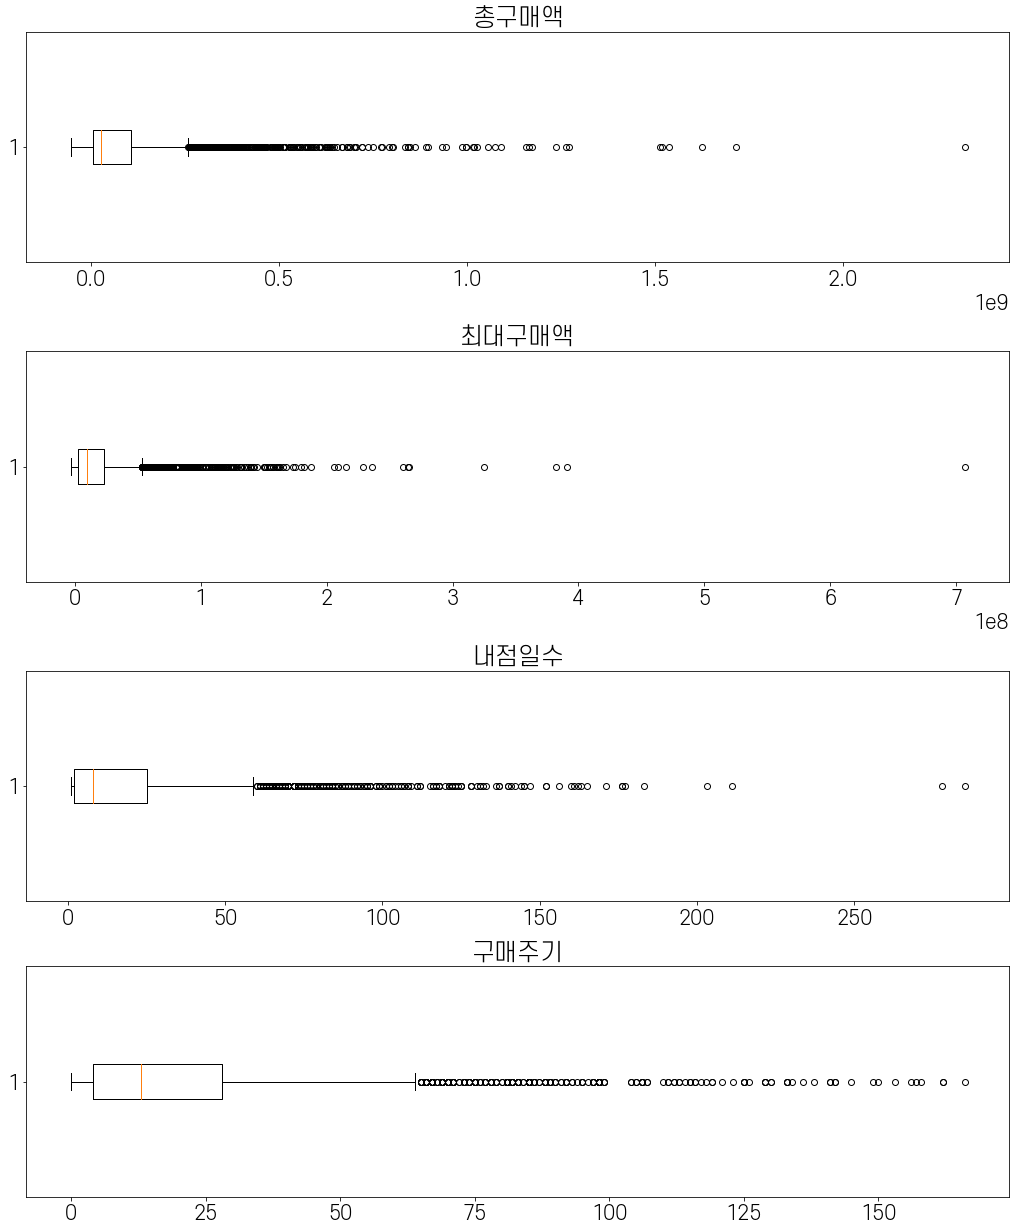

In [11]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

fig, axs = plt.subplots(4,1, figsize=(14,17), constrained_layout=True)

axs[0].boxplot(data=X_train, x='총구매액', vert=False)
axs[0].set_title('총구매액')
axs[1].boxplot(data=X_train, x='최대구매액', vert=False)
axs[1].set_title('최대구매액')
axs[2].boxplot(data=X_train, x='내점일수', vert=False)
axs[2].set_title('내점일수')
axs[3].boxplot(data=X_train, x='구매주기', vert=False)
axs[3].set_title('구매주기')

plt.show()

IQR Outlier으로 이상치를 제거했다가는 참사가 날 것만 같다.
수동으로 최대구매액의 최댓값, 내점일수의 상위 2개 레코드를 삭제.

In [12]:
X_train.sort_values('최대구매액')

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
cust_id,,,,,,,,,,,,,,,,,,,,,
1659,-2992000,-2992000,2992000.0,1,1.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2104,5000,5000,0.0,1,1.000000,0.000000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
297,10500,5500,0.0,1,2.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
248,10000,10000,0.0,1,1.000000,1.000000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
942,10900,10900,0.0,1,1.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,598402790,265650000,153190000.0,81,5.679012,0.267391,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1975,702697500,325000000,0.0,6,1.000000,0.666667,39,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1159,488018850,382096000,25859400.0,18,3.388889,0.377049,17,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train.sort_values('총구매액', ascending=False)[:3]

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
cust_id,,,,,,,,,,,,,,,,,,,,,
2513,2323180070,137856000,299456050.0,203,3.285714,0.299850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1626,1715219490,706629000,11423000.0,162,2.425926,0.371501,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2049,1624088220,229080000,350514400.0,91,4.395604,0.330000,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train.sort_values('내점일수', ascending=False)[:3]

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
cust_id,,,,,,,,,,,,,,,,,,,,,
1541,319592410,7650000,2105500.0,285,6.529825,0.268673,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21,208520880,20280000,1524900.0,278,5.471223,0.266272,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2989,408176060,17641000,11688000.0,211,6.298578,0.209932,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


최대구매액의 최댓값: 1626

총 구매액의 최댓값: 2513

내점일수: 1541, 21

In [15]:
X_train.drop([1626, 2513, 1541, 21], inplace=True)

In [16]:
X_train.reset_index(inplace=True)

## 다중공선성 체크

<AxesSubplot:>

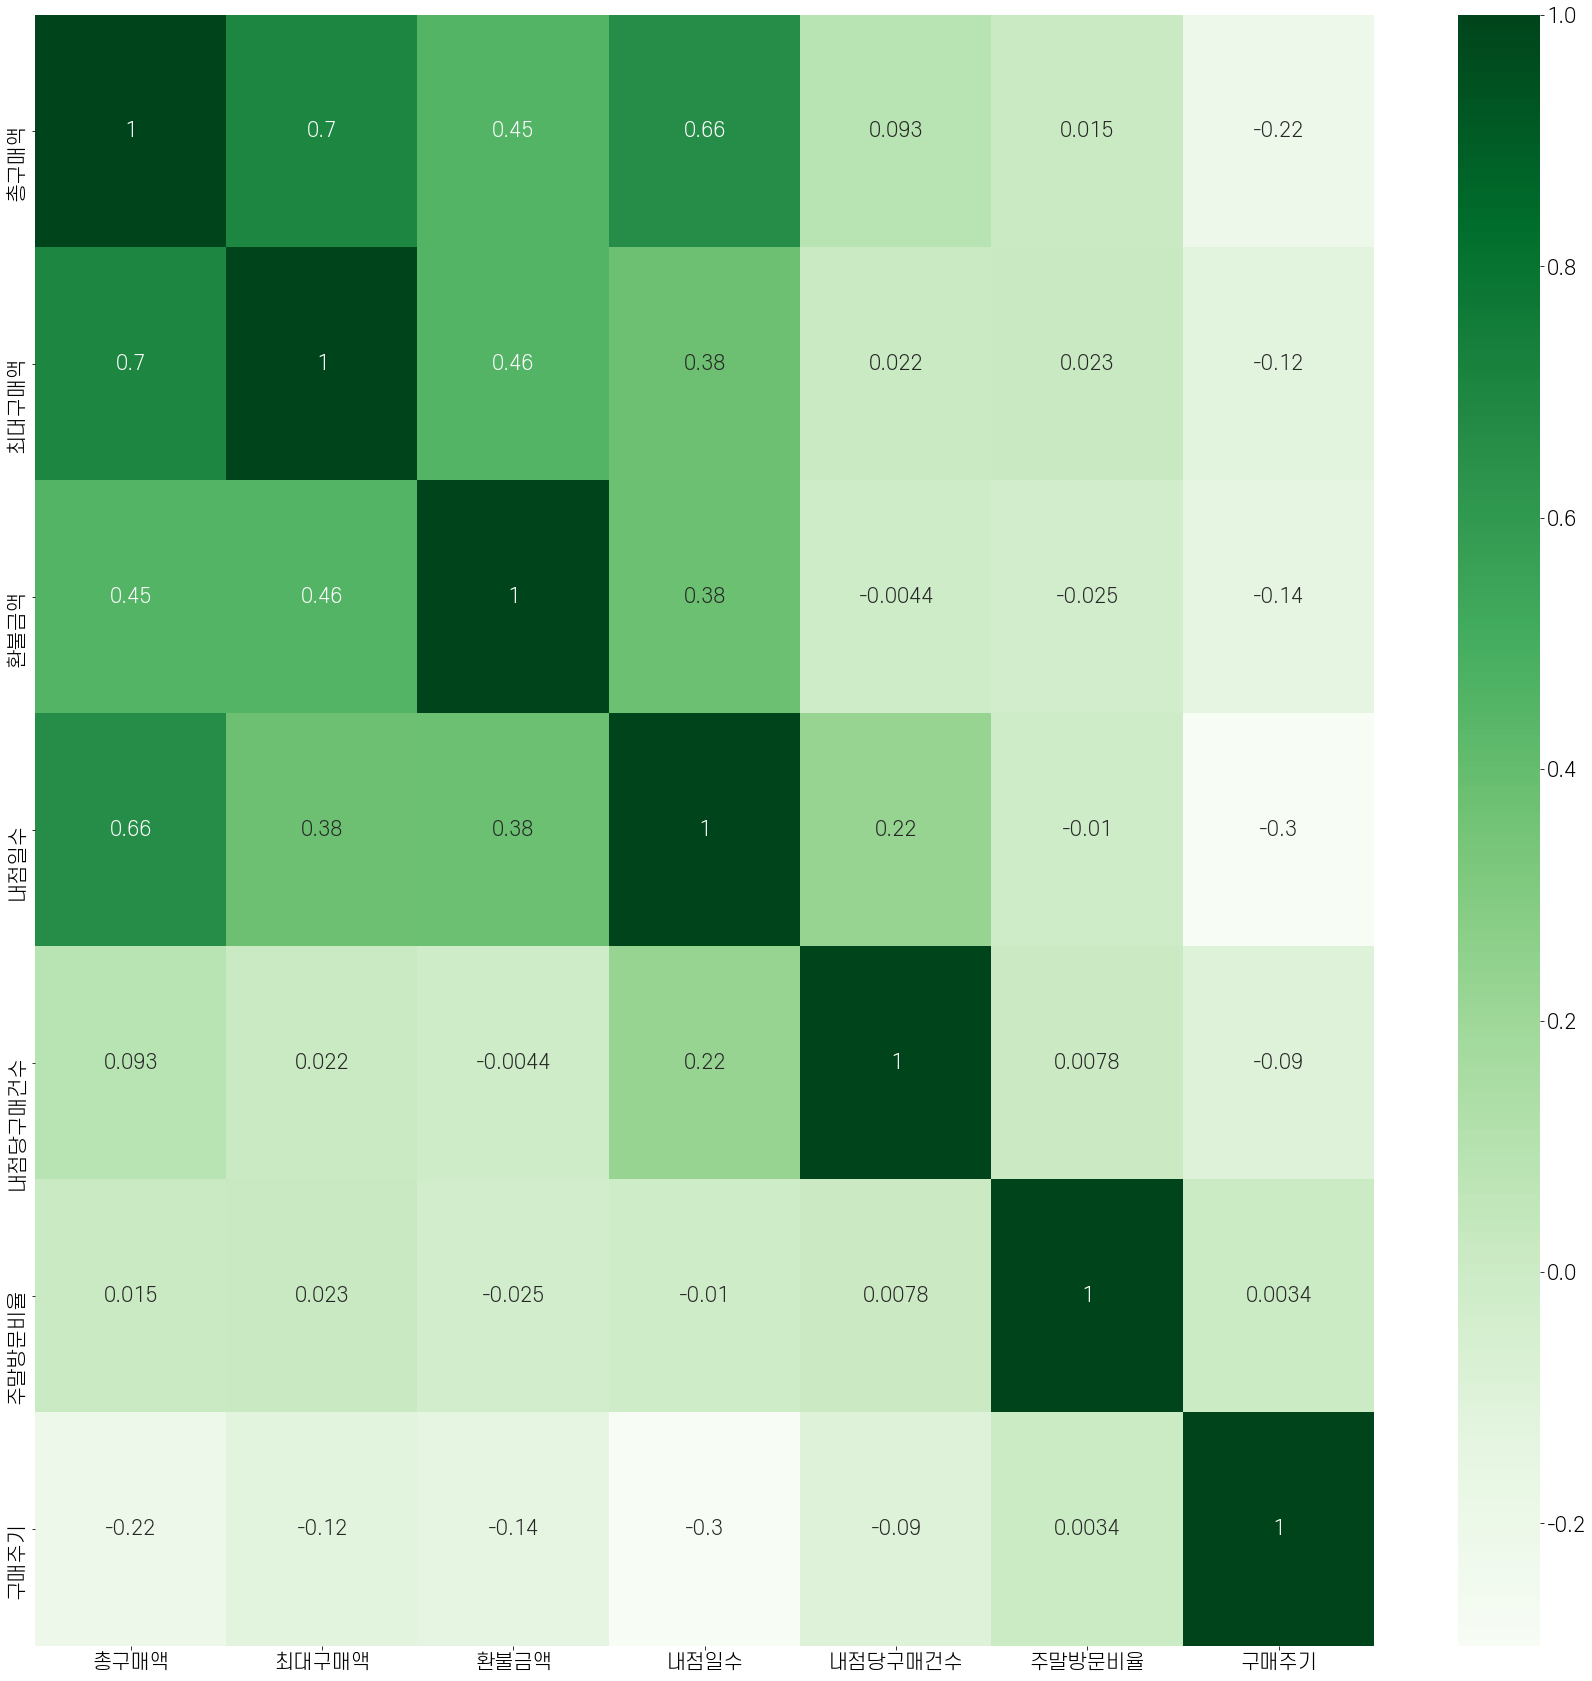

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train[['총구매액','최대구매액','환불금액','내점일수','내점당구매건수','주말방문비율','구매주기']].corr(), annot=True, cmap='Greens')

최대구매액과 총구매액 사이에 거슬리는 상관관계가 있는데..

In [35]:
X_train[['총구매액','최대구매액','환불금액','내점일수','내점당구매건수','주말방문비율','구매주기']].values

array([[6.82828400e+07, 1.12640000e+07, 6.86000000e+06, ...,
        3.89473684e+00, 5.27027027e-01, 1.70000000e+01],
       [2.13600000e+06, 2.13600000e+06, 3.00000000e+05, ...,
        1.50000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.19700000e+06, 1.63900000e+06, 0.00000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.50000000e+04, 7.50000000e+04, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.87500000e+06, 1.00000000e+06, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.90000000e+01],
       [2.63101550e+08, 3.46320000e+07, 5.97300000e+06, ...,
        2.42105263e+00, 4.67391304e-01, 8.00000000e+00]])

In [37]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(X_train[['총구매액','최대구매액','환불금액','내점일수','내점당구매건수','주말방문비율','구매주기']].values)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca_fit = pca.fit(x)

In [42]:
pca_fit.explained_variance_ratio_

array([0.37825549, 0.15793343, 0.14349134, 0.12690387, 0.08791126,
       0.07698065, 0.02852395])

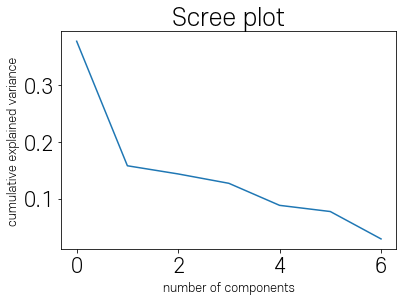

In [46]:
plt.title('Scree plot')
plt.xlabel('number of components', fontsize=12)
plt.ylabel('cumulative explained variance', fontsize=12)
plt.plot(pca_fit.explained_variance_ratio_)
plt.show()

랜덤포레스트 쓸게 아니라면 